In [3]:
%load_ext rpy2.ipython

In [5]:
%R library("seqinr")


array(['seqinr', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [6]:
%%R
getncbiseq <- function(accession)
{
 require("seqinr") # this function requires the SeqinR R package
 # first find which ACNUC database the accession is stored in:
 dbs <- c("genbank","refseq","refseqViruses","bacterial")
 numdbs <- length(dbs)
 for (i in 1:numdbs)
 {
    db <- dbs[i]
    print ("choosing bank ")
    print (db)
    choosebank(db)
    # check if the sequence is in ACNUC database 'db':
    print (db)
    resquery <- try(query(".tmpquery", paste("AC=", accession)), silent = TRUE)
    if (!(inherits(resquery, "try-error")))
    {
       queryname <- "query2"
       thequery <- paste("AC=",accession,sep="")
       query(`queryname`,`thequery`)
       # see if a sequence was retrieved:
       seq <- getSequence(query2$req[[1]])
       closebank()
       return(seq)
    }
    closebank()
 }
 print(paste("ERROR: accession",accession,"was not found"))
}

In [8]:
%%R 
dengue <- read.fasta(file = "dengue_NC_001477.fasta")
dengueseq <- dengue[[1]]
length(dengueseq)

[1] 10735


In [20]:
%%R
table(dengueseq)

dengueseq
   a    c    g    t 
3426 2240 2770 2299 


In [14]:
%R GC(dengueseq)

array([ 0.46669772])

In [16]:
%R (sum(dengueseq=='g') + sum(dengueseq=='c')) / length(dengueseq)

array([ 0.46669772])

In [17]:
%%R
print (count(dengueseq,1))
count(dengueseq,2)


   a    c    g    t 
3426 2240 2770 2299 

  aa   ac   ag   at   ca   cc   cg   ct   ga   gc   gg   gt   ta   tc   tg   tt 
1108  720  890  708  901  523  261  555  976  500  787  507  440  497  832  529 


In [21]:
%%R
dengueseq[452:535]

 [1] "c" "g" "a" "g" "g" "g" "g" "g" "a" "g" "a" "g" "c" "c" "g" "c" "a" "c" "a"
[20] "t" "g" "a" "t" "a" "g" "t" "t" "a" "g" "c" "a" "a" "g" "c" "a" "g" "g" "a"
[39] "a" "a" "g" "a" "g" "g" "a" "a" "a" "a" "t" "c" "a" "c" "t" "t" "t" "t" "g"
[58] "t" "t" "t" "a" "a" "g" "a" "c" "c" "t" "c" "t" "g" "c" "a" "g" "g" "t" "g"
[77] "t" "c" "a" "a" "c" "a" "t" "g"


In [22]:
%%R
starts <- seq(1, length(dengueseq)-2000, by = 2000)
for (i in 1:length(starts)) {
    chunk <- dengueseq[starts[i]:(starts[i]+1999)]
    chunkGC <- GC(chunk)
    print (chunkGC)
}

[1] 0.465
[1] 0.4525
[1] 0.4705
[1] 0.479
[1] 0.4545


In [24]:
%%R
leprae <- read.fasta(file = "Q9CD83.fasta")
ulcerans <- read.fasta(file = "A0PQ23.fasta")
lepraeseq <- leprae[[1]]
ulceransseq <- ulcerans[[1]]

In [25]:
%R lepraeseq

array(['m', 't', 'n', 'r', 't', 'l', 's', 'r', 'e', 'e', 'i', 'r', 'k',
       'l', 'd', 'r', 'd', 'l', 'r', 'i', 'l', 'v', 'a', 't', 'n', 'g',
       't', 'l', 't', 'r', 'v', 'l', 'n', 'v', 'v', 'a', 'n', 'e', 'e',
       'i', 'v', 'v', 'd', 'i', 'i', 'n', 'q', 'q', 'l', 'l', 'd', 'v',
       'a', 'p', 'k', 'i', 'p', 'e', 'l', 'e', 'n', 'l', 'k', 'i', 'g',
       'r', 'i', 'l', 'q', 'r', 'd', 'i', 'l', 'l', 'k', 'g', 'q', 'k',
       's', 'g', 'i', 'l', 'f', 'v', 'a', 'a', 'e', 's', 'l', 'i', 'v',
       'i', 'd', 'l', 'l', 'p', 't', 'a', 'i', 't', 't', 'y', 'l', 't',
       'k', 't', 'h', 'h', 'p', 'i', 'g', 'e', 'i', 'm', 'a', 'a', 's',
       'r', 'i', 'e', 't', 'y', 'k', 'e', 'd', 'a', 'q', 'v', 'w', 'i',
       'g', 'd', 'l', 'p', 'c', 'w', 'l', 'a', 'd', 'y', 'g', 'y', 'w',
       'd', 'l', 'p', 'k', 'r', 'a', 'v', 'g', 'r', 'r', 'y', 'r', 'i',
       'i', 'a', 'g', 'g', 'q', 'p', 'v', 'i', 'i', 't', 't', 'e', 'y',
       'f', 'l', 'r', 's', 'v', 'f', 'q', 'd', 't', 'p', 'r', 'e

In [26]:
%%R
lepraeseq

  [1] "m" "t" "n" "r" "t" "l" "s" "r" "e" "e" "i" "r" "k" "l" "d" "r" "d" "l"
 [19] "r" "i" "l" "v" "a" "t" "n" "g" "t" "l" "t" "r" "v" "l" "n" "v" "v" "a"
 [37] "n" "e" "e" "i" "v" "v" "d" "i" "i" "n" "q" "q" "l" "l" "d" "v" "a" "p"
 [55] "k" "i" "p" "e" "l" "e" "n" "l" "k" "i" "g" "r" "i" "l" "q" "r" "d" "i"
 [73] "l" "l" "k" "g" "q" "k" "s" "g" "i" "l" "f" "v" "a" "a" "e" "s" "l" "i"
 [91] "v" "i" "d" "l" "l" "p" "t" "a" "i" "t" "t" "y" "l" "t" "k" "t" "h" "h"
[109] "p" "i" "g" "e" "i" "m" "a" "a" "s" "r" "i" "e" "t" "y" "k" "e" "d" "a"
[127] "q" "v" "w" "i" "g" "d" "l" "p" "c" "w" "l" "a" "d" "y" "g" "y" "w" "d"
[145] "l" "p" "k" "r" "a" "v" "g" "r" "r" "y" "r" "i" "i" "a" "g" "g" "q" "p"
[163] "v" "i" "i" "t" "t" "e" "y" "f" "l" "r" "s" "v" "f" "q" "d" "t" "p" "r"
[181] "e" "e" "l" "d" "r" "c" "q" "y" "s" "n" "d" "i" "d" "t" "r" "s" "g" "d"
[199] "r" "f" "v" "l" "h" "g" "r" "v" "f" "k" "n" "l"
attr(,"name")
[1] "sp|Q9CD83|PHBS_MYCLE"
attr(,"Annot")
[1] ">sp|Q9CD83|PHBS_MYCLE Chori

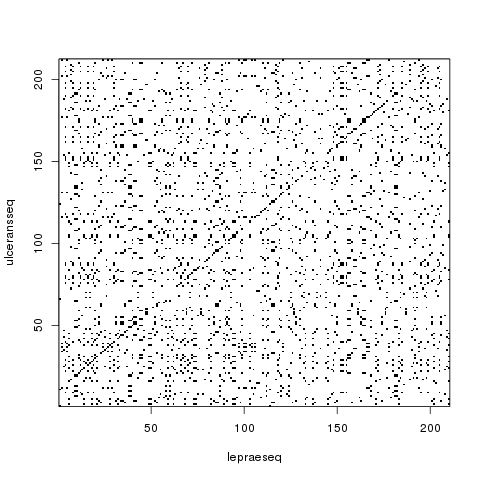

In [27]:
%R dotPlot(lepraeseq, ulceransseq)

# Multiple alignment

In [45]:
%%R
seqnames <- c("P06747", "P0C569", "O56773", "Q5VKP1")

seqs <- list(length(seqnames))
for (i in 1:length(seqnames)) {
    print (seqnames[[i]])
    s <-read.fasta(file = paste(seqnames[[i]],".fasta", sep=""))
    seqs[[i]] = toupper(s[[1]])
}
seqs[[1]]   

[1] "P06747"
[1] "P0C569"
[1] "O56773"
[1] "Q5VKP1"
  [1] "M" "S" "K" "I" "F" "V" "N" "P" "S" "A" "I" "R" "A" "G" "L" "A" "D" "L"
 [19] "E" "M" "A" "E" "E" "T" "V" "D" "L" "I" "N" "R" "N" "I" "E" "D" "N" "Q"
 [37] "A" "H" "L" "Q" "G" "E" "P" "I" "E" "V" "D" "N" "L" "P" "E" "D" "M" "G"
 [55] "R" "L" "H" "L" "D" "D" "G" "K" "S" "P" "N" "P" "G" "E" "M" "A" "K" "V"
 [73] "G" "E" "G" "K" "Y" "R" "E" "D" "F" "Q" "M" "D" "E" "G" "E" "D" "P" "S"
 [91] "L" "L" "F" "Q" "S" "Y" "L" "D" "N" "V" "G" "V" "Q" "I" "V" "R" "Q" "I"
[109] "R" "S" "G" "E" "R" "F" "L" "K" "I" "W" "S" "Q" "T" "V" "E" "E" "I" "I"
[127] "S" "Y" "V" "A" "V" "N" "F" "P" "N" "P" "P" "G" "K" "S" "S" "E" "D" "K"
[145] "S" "T" "Q" "T" "T" "G" "R" "E" "L" "K" "K" "E" "T" "T" "P" "T" "P" "S"
[163] "Q" "R" "E" "S" "Q" "S" "S" "K" "A" "R" "M" "A" "A" "Q" "T" "A" "S" "G"
[181] "P" "P" "A" "L" "E" "W" "S" "A" "T" "N" "E" "E" "D" "D" "L" "S" "V" "E"
[199] "A" "E" "I" "A" "H" "Q" "I" "A" "E" "S" "F" "S" "K" "K" "Y" "K" "F" "P"
[217] "S" "R

In [28]:
!cat P06747.fasta P0C569.fasta O56773.fasta Q5VKP1.fasta > my5sequences.ext

In [30]:
!clustalw2 -INFILE=my5sequences.ext -ALIGN -OUTPUT=PHYLIP




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: sp|P06747|PHOSP_RABVP   297 aa
Sequence 2: sp|P0C569|PHOSP_MOKV    303 aa
Sequence 3: sp|O56773|PHOSP_LBV     305 aa
Sequence 4: sp|Q5VKP1|PHOSP_WCBV    297 aa
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  46
Sequences (1:3) Aligned. Score:  47
Sequences (1:4) Aligned. Score:  42
Sequences (2:3) Aligned. Score:  59
Sequences (2:4) Aligned. Score:  46
Sequences (3:4) Aligned. Score:  45
Guide tree file created:   [my5sequences.dnd]

There are 3 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:5312
Group 2: Sequences:   3      Score:4785
Group 3: Sequences:   4      Score:4636
Alignment Score 5207

PHYLIP-Alignment file created   [my5sequences.phy]



In [35]:
%%R 
virusaln  <- read.alignment(file = "my5sequences.phy", format = "phylip");
virusaln$seq

[[1]]
[1] "mskdlvhpsliragivelemaeettdlinrtiesnqahlqgeplyvdslpedmsrlriedksrrtkteeeerdegsseednylsegqdplipfqnfldeigaravkrlktgegffrvwsalsddikgyvstnim-tsgerdtksiqiqteptasvssgnesrhdsesmhdpndkkdhtpdhdvvpdiesstdkgeirdiegevahqvaesfskkykfpsrssgiflwnfeqlkmnlddivkaamnvpgveriaekggklplrcilgfvaldsskrfrlladndkvarliqedinsymarleeae--"

[[2]]
[1] "mskglihpsairsglvdlemaeetvdlvhknladsqahlqgeplnvdslpedmrkmrltnapsereiieedeeeyssedeyylsqgqdpmvpfqnfldelgtqivrrmksgdgffkiwsaasedikgyvlstfm-kpetqatvskptqtdslsvprpsqgytsvprdkpsnsesqgggvkpkkvqksewtrdtdeisdiegevahqvaesfskkykfpsrssgiflwnfeqlkmnlddivktsmnvpgvdkiaekggklplrcilgfvsldsskrfrlladtdkvarlmqddihnymtrieeidhn"

[[3]]
[1] "mskifvnpsairagladlemaeetvdlinrniednqahlqgepievdnlpedmgrlhlddgkspnpgemakvgegkyredfqmdegedpsllfqsyldnvgvqivrqirsgerflkiwsqtveeiisyvavnfp-nppgkssedkstqttgrelkkettptpsqresqsskarmaaqtasgppalewsatneeddls-veaeiahqiaesfskkykfpsrssgillynfeqlkmnlddivkeaknvpgvtrlardgsklplrcvlgwvalanskkfqllvesnklskimqddlnrytsc-------"

[[4]]
[1] "mskslihpsdlragladiemadetvdlvy

In [36]:
%%R
printMultipleAlignment <- function(alignment, chunksize=60)
  {
     # this function requires the Biostrings package
     require("Biostrings")
     # find the number of sequences in the alignment
     numseqs <- alignment$nb
     # find the length of the alignment
     alignmentlen <- nchar(alignment$seq[[1]])
     starts <- seq(1, alignmentlen, by=chunksize)
     n <- length(starts)
     # get the alignment for each of the sequences:
     aln <- vector()
     lettersprinted <- vector()
     for (j in 1:numseqs)
     {
        alignmentj <- alignment$seq[[j]]
        aln[j] <- alignmentj
        lettersprinted[j] <- 0
     }
     # print out the alignment in blocks of 'chunksize' columns:
     for (i in 1:n) { # for each of n chunks
        for (j in 1:numseqs)
        {
           alnj <- aln[j]
           chunkseqjaln <- substring(alnj, starts[i], starts[i]+chunksize-1)
           chunkseqjaln <- toupper(chunkseqjaln)
           # Find out how many gaps there are in chunkseqjaln:
           gapsj <- countPattern("-",chunkseqjaln) # countPattern() is from Biostrings package
           # Calculate how many residues of the first sequence we have printed so far in the alignment:
           lettersprinted[j] <- lettersprinted[j] + chunksize - gapsj
           print(paste(chunkseqjaln,lettersprinted[j]))
        }
        print(paste(' '))
     }
  }

In [38]:
%%R 
printMultipleAlignment(virusaln, 60)

[1] "MSKDLVHPSLIRAGIVELEMAEETTDLINRTIESNQAHLQGEPLYVDSLPEDMSRLRIED 60"
[1] "MSKGLIHPSAIRSGLVDLEMAEETVDLVHKNLADSQAHLQGEPLNVDSLPEDMRKMRLTN 60"
[1] "MSKIFVNPSAIRAGLADLEMAEETVDLINRNIEDNQAHLQGEPIEVDNLPEDMGRLHLDD 60"
[1] "MSKSLIHPSDLRAGLADIEMADETVDLVYKNLSEGQAHLQGEPFDIKDLPEGVSKLQISD 60"
[1] " "
[1] "KSRRTKTEEEERDEGSSEEDNYLSEGQDPLIPFQNFLDEIGARAVKRLKTGEGFFRVWSA 120"
[1] "APSEREIIEEDEEEYSSEDEYYLSQGQDPMVPFQNFLDELGTQIVRRMKSGDGFFKIWSA 120"
[1] "GKSPNPGEMAKVGEGKYREDFQMDEGEDPSLLFQSYLDNVGVQIVRQIRSGERFLKIWSQ 120"
[1] "NVRSDTSPNEYSDEDDEEGEDEYEEVYDPVSAFQDFLDETGSYLISKLKKGEKIKKTWSE 120"
[1] " "
[1] "LSDDIKGYVSTNIM-TSGERDTKSIQIQTEPTASVSSGNESRHDSESMHDPNDKKDHTPD 179"
[1] "ASEDIKGYVLSTFM-KPETQATVSKPTQTDSLSVPRPSQGYTSVPRDKPSNSESQGGGVK 179"
[1] "TVEEIISYVAVNFP-NPPGKSSEDKSTQTTGRELKKETTPTPSQRESQSSKARMAAQTAS 179"
[1] "VSRVIYSYVMSNFPPRPPKPTTKDIAVQADLKKPNEIQKISEHKSKSEPSPREPVVEMHK 180"
[1] " "
[1] "HDVVPDIESSTDKGEIRDIEGEVAHQVAESFSKKYKFPSRSSGIFLWNFEQLKMNLDDIV 239"
[1] "PKKVQKSEWTRDTDEISDIEGEVAHQVAESFSKKYKFPSRSSGIFLWNFEQL

In [40]:
%%R
cleanAlignment <- function(alignment, minpcnongap, minpcid)
  {
     # make a copy of the alignment to store the new alignment in:
     newalignment <- alignment
     # find the number of sequences in the alignment
     numseqs <- alignment$nb
     # empty the alignment in "newalignment")
     for (j in 1:numseqs) { newalignment$seq[[j]] <- "" }
     # find the length of the alignment
     alignmentlen <- nchar(alignment$seq[[1]])
     # look at each column of the alignment in turn:
     for (i in 1:alignmentlen)
     {
        # see what percent of the letters in this column are non-gaps:
        nongap <- 0
        for (j in 1:numseqs)
        {
           seqj <- alignment$seq[[j]]
           letterij <- substr(seqj,i,i)
           if (letterij != "-") { nongap <- nongap + 1}
        }
        pcnongap <- (nongap*100)/numseqs
        # Only consider this column if at least minpcnongap % of the letters are not gaps:
        if (pcnongap >= minpcnongap)
        {
           # see what percent of the pairs of letters in this column are identical:
           numpairs <- 0; numid <- 0
           # find the letters in all of the sequences in this column:
           for (j in 1:(numseqs-1))
           {
              seqj <- alignment$seq[[j]]
              letterij <- substr(seqj,i,i)
              for (k in (j+1):numseqs)
              {
                 seqk <- alignment$seq[[k]]
                 letterkj <- substr(seqk,i,i)
                 if (letterij != "-" && letterkj != "-")
                 {
                    numpairs <- numpairs + 1
                    if (letterij == letterkj) { numid <- numid + 1}
                 }
              }
           }
           pcid <- (numid*100)/(numpairs)
           # Only consider this column if at least %minpcid of the pairs of letters are identical:
           if (pcid >= minpcid)
           {
               for (j in 1:numseqs)
               {
                  seqj <- alignment$seq[[j]]
                  letterij <- substr(seqj,i,i)
                  newalignmentj <- newalignment$seq[[j]]
                  newalignmentj <- paste(newalignmentj,letterij,sep="")
                  newalignment$seq[[j]] <- newalignmentj
               }
           }
        }
     }
     return(newalignment)
  }

In [41]:
%%R
cleanedvirusaln <- cleanAlignment(virusaln, 30, 30)
printMultipleAlignment(cleanedvirusaln)

[1] "MSKLVHPSIRAGIVELEMAEETTDLIRTIQAHLQGEPVDLPEDMRLIDREEEDEGDPFQF 60"
[1] "MSKLIHPSIRSGLVDLEMAEETVDLVKNLQAHLQGEPVDLPEDMKMLNSEEEEQGDPFQF 60"
[1] "MSKFVNPSIRAGLADLEMAEETVDLIRNIQAHLQGEPVDLPEDMRLLDSAERDEGDPFQY 60"
[1] "MSKLIHPSLRAGLADIEMADETVDLVKNLQAHLQGEPIKLPEGVKLIDREEEEEVDPFQF 60"
[1] " "
[1] "LDEGVKGEFRWSSIGYVNIMSTSIQTHSDESGEDEEVAHQVAESFSKKYKFPSRSSGIFL 120"
[1] "LDEGVKGDFKWSSIGYVTFMPTSKQTSDSETDEDEEVAHQVAESFSKKYKFPSRSSGIFL 120"
[1] "LDNGVRGEFKWSVISYVNFPPSDKQTSSSSTDD-EEIAHQIAESFSKKYKFPSRSSGILL 119"
[1] "LDEGIKGEIKWSSISYVNFPPTDIQAHSS--DDAEEIAHQVAESYSKKYKFPSKSSGIFL 118"
[1] " "
[1] "WNFEQLKMNLDDIVKANVPGVIAEGGKLPLRCLGVLSKRFRLLADKVRLIQEDINYEE 180"
[1] "WNFEQLKMNLDDIVKSNVPGVIAEGGKLPLRCLGVLSKRFRLLADKVRLMQDDIHYEE 180"
[1] "YNFEQLKMNLDDIVKANVPGVLARGSKLPLRCLGVLSKKFQLLVNKLKIMQDDLNY-- 177"
[1] "WNFEQLKMNLDDIVQAGVPGIIVEGGKLPLRCLGVLSKRFRSLVDKLKLMQEDLNYNN 178"
[1] " "


In [42]:
%%R
virusdist <- dist.alignment(virusaln) 
virusdist

           sp|P0C569| sp|O56773| sp|P06747|
sp|O56773|  0.4142670                      
sp|P06747|  0.4678196  0.4714045           
sp|Q5VKP1|  0.4828127  0.5067117  0.5034130


In [57]:
%%R
seqnames <- c("AF049118", "AF049114", "AF049119", "AF049115") 
seqs <- list(length(seqnames))
for (i in 1:length(seqnames)) {
    print (seqnames[[i]])
    s <-read.fasta(file = paste(seqnames[[i]],".fasta", sep=""))
    seqs[[i]] = toupper(s[[1]])
}

[1] "AF049118"
[1] "AF049114"
[1] "AF049119"
[1] "AF049115"


In [58]:
%R write.fasta(seqs, seqnames, file="virusmRNA.fasta")

In [59]:
!clustalw2 -INFILE=virusmRNA.fasta -ALIGN -OUTPUT=PHYLIP




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: AF049118    1083 bp
Sequence 2: AF049114    1016 bp
Sequence 3: AF049119    1010 bp
Sequence 4: AF049115     990 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  62
Sequences (1:3) Aligned. Score:  62
Sequences (1:4) Aligned. Score:  53
Sequences (2:3) Aligned. Score:  72
Sequences (2:4) Aligned. Score:  56
Sequences (3:4) Aligned. Score:  54
Guide tree file created:   [virusmRNA.dnd]

There are 3 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:15675
Group 2: Sequences:   3      Score:13650
Group 3: Sequences:   4      Score:11365
Alignment Score 21334

PHYLIP-Alignment file created   [virusmRNA.phy]



In [60]:
%%R 
library("ape")
virusmRNAaln  <- read.alignment(file = "virusmRNA.phy", format = "phylip")
virusmRNAalnbin <- as.DNAbin(virusmRNAaln) # Convert the alignment to "DNAbin" format
virusmRNAdist <- dist.dna(virusmRNAalnbin) # Calculate the genetic distance matrix
virusmRNAdist 


          AF049114  AF049119  AF049118
AF049119 0.3400576                    
AF049118 0.5235850 0.5637372          
AF049115 0.6854129 0.6852311 0.7656023


In [61]:
%%R
unrootedNJtree <- function(alignment,type)
  {
     # this function requires the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        return(mytree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     mytree <- makemytree(mymat)
     # bootstrap the tree
     myboot <- boot.phylo(mytree, mymat, makemytree)
     # plot the tree:
     plot.phylo(mytree,type="u")   # plot the unrooted phylogenetic tree
     nodelabels(myboot,cex=0.7)    # plot the bootstrap values
     mytree$node.label <- myboot   # make the bootstrap values be the node labels
     return(mytree)
  }

  |======================================================================| 100%
Calculating bootstrap values... done.


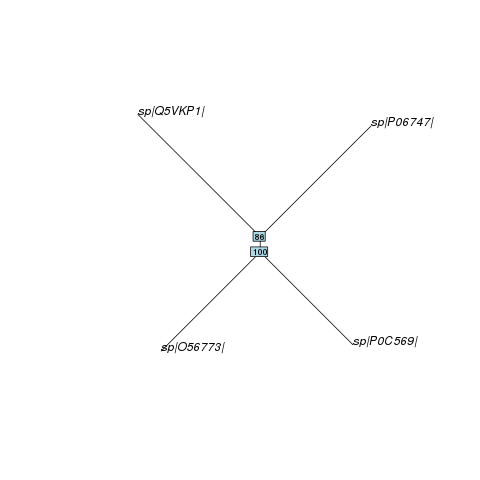

In [62]:
%R virusalntree <- unrootedNJtree(virusaln,type="protein")

  |======================================================================| 100%
Calculating bootstrap values... done.


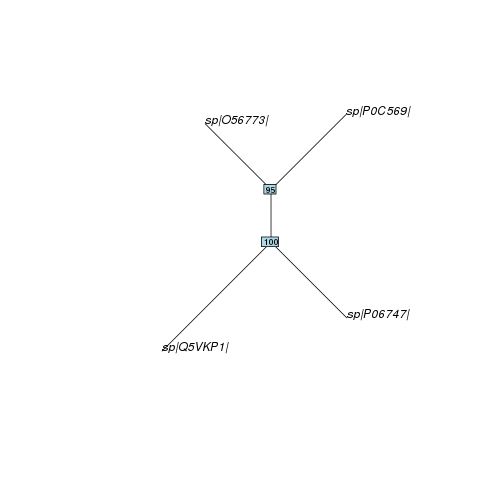

In [64]:
%R cleanedvirusalntree <- unrootedNJtree(cleanedvirusaln,type="protein")

In [65]:
%%R
seqnames <- c("Q10572","E3M2K8","Q8WS01","E1FUV2","A8NSK3","Q9VT99")
seqs <- list(length(seqnames))
for (i in 1:length(seqnames)) {
    print (seqnames[[i]])
    s <-read.fasta(file = paste(seqnames[[i]],".fasta", sep=""))
    seqs[[i]] = toupper(s[[1]])
}

[1] "Q10572"
[1] "E3M2K8"
[1] "Q8WS01"
[1] "E1FUV2"
[1] "A8NSK3"
[1] "Q9VT99"


In [67]:
%R write.fasta(seqs, seqnames, file="fox1.fasta")

In [68]:
!clustalw2 -INFILE=fox1.fasta -ALIGN -OUTPUT=PHYLIP




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: Q10572       415 aa
Sequence 2: E3M2K8       420 aa
Sequence 3: Q8WS01       141 aa
Sequence 4: E1FUV2       218 aa
Sequence 5: A8NSK3       267 aa
Sequence 6: Q9VT99       889 aa
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  89
Sequences (1:3) Aligned. Score:  6
Sequences (1:4) Aligned. Score:  42
Sequences (1:5) Aligned. Score:  34
Sequences (1:6) Aligned. Score:  30
Sequences (2:3) Aligned. Score:  6
Sequences (2:4) Aligned. Score:  46
Sequences (2:5) Aligned. Score:  37
Sequences (2:6) Aligned. Score:  30
Sequences (3:4) Aligned. Score:  7
Sequences (3:5) Aligned. Score:  7
Sequences (3:6) Aligned. Score:  7
Sequences (4:5) Aligned. Score:  94
Sequences (4:6) Aligned. Score:  36
Sequences (5:6) Aligned. Score:  30
Guide tree file created:   [fox1.dnd]

There are 5 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:8520
Group 2: Sequences

In [69]:
%%R
fox1aln  <- read.alignment(file = "fox1.phy", format = "phylip")

In [78]:
%%R
rootedNJtree <- function(alignment, theoutgroup, type)
  {
     # load the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat, outgroup=`theoutgroup`)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        myrootedtree <- root(mytree, outgroup, r=TRUE)
        return(myrootedtree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     myrootedtree <- makemytree(mymat, outgroup=theoutgroup)
     # bootstrap the tree
     myboot <- boot.phylo(myrootedtree, mymat, makemytree)
     # plot the tree:
     plot.phylo(myrootedtree, type="p")  # plot the rooted phylogenetic tree
     nodelabels(myboot,cex=0.7)          # plot the bootstrap values
#     mytree$node.label <- myboot   # make the bootstrap values be the node labels
     return(myrootedtree)
  }

  |======================================================================| 100%
Calculating bootstrap values... done.


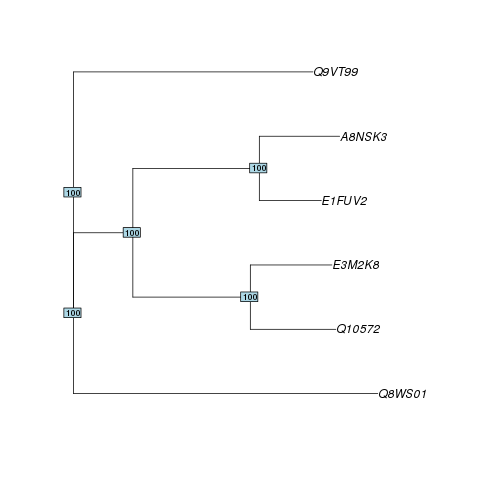

In [79]:
%%R
fox1alntree <- rootedNJtree(fox1aln, "Q9VT99",type="protein")

  |======================================================================| 100%
Calculating bootstrap values... done.


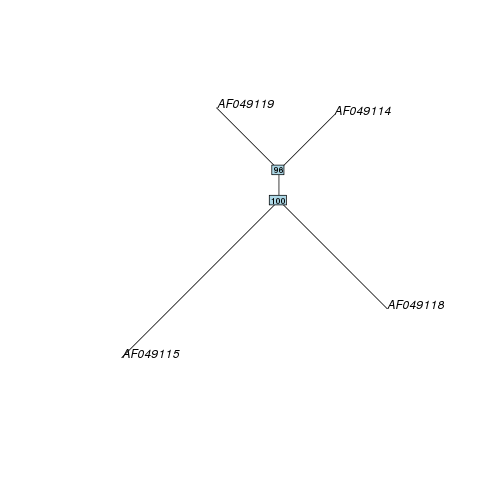

In [80]:
%%R
virusmRNAaln  <- read.alignment(file = "virusmRNA.phy", format = "phylip")
virusmRNAalntree <- unrootedNJtree(virusmRNAaln, type="DNA")

In [81]:
%R write.tree(virusmRNAalntree, "virusmRNA.tre")


In [82]:
!ls

A0PQ23.fasta				       my5sequences.dnd
A8NSK3.fasta				       my5sequences.ext
aa.aln					       my5sequences.phy
aa.dnd					       O56773.fasta
aa.ext					       P06747.aln
aa.phy					       P06747.fasta
AF049114.fasta				       P0C569.aln
AF049115.fasta				       P0C569.fasta
AF049118.fasta				       Q10572.fasta
AF049119.fasta				       Q10572.fasta.1
ape_3.3.tar.gz				       Q5VKP1.fasta
clustalw2				       Q8WS01.fasta
clustalw-2.1-linux-x86_64-libcppstatic.tar.gz  Q9CD83.fasta
dengue_NC_001477.fasta			       Q9VT99.fasta
dot-ipython				       README.txt
E1FUV2.fasta				       tmp
E3M2K8.fasta				       ucaldas.20152.msc
expm					       Untitled1.ipynb
expm_0.99-1.1.tar.gz			       Untitled2.ipynb
fox1.dnd				       Untitled3.ipynb
fox1.fasta				       Untitled.ipynb
fox1.phy				       virusmRNA.dnd
gee_4.13-19.tar.gz			       virusmRNA.fasta
ls_orchid.fasta				       virusmRNA.phy
ls_orchid.fasta.1			       virusmRNA.tre
ls_orchid.gbk


In [85]:
!cat virusmRNA.tre

(AF049115:0.4536315847,AF049118:0.3119706734,(AF049114:0.1600362146,AF049119:0.1800213995)96:0.06166160344)100;


# Computational gene finding

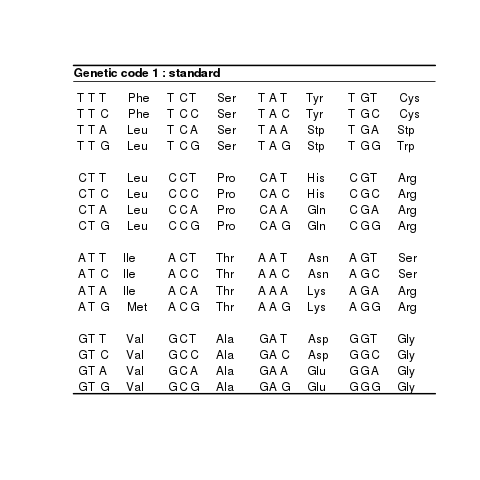

In [86]:
%%R
library(seqinr)
tablecode()

In [87]:
%%R
library("Biostrings")
s1 <- "aaaatgcagtaacccatgccc"
matchPattern("atg", s1) # Find all ATGs in the sequence s1

  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]


In [180]:
%%R
findPotentialStartsAndStops <- function(sequence)
  {
     # Define a vector with the sequences of potential start and stop codons
     codons            <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- attr(attr(occurrences, "ranges"),"start")
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Return a list variable including vectors "positions" and "types":
     mylist <- list(positions,types)
     return(mylist)
  }

In [181]:
%%R
s1 <- "aaaatgcagtaacccatgccc"
findPotentialStartsAndStops(s1)

[[1]]
[1]  4 10 16

[[2]]
[1] "atg" "taa" "atg"



In [151]:
%%R 
codons            <- c("atg", "taa", "tag", "tga")
for (i in 1:1){
    r <- matchPattern(codons[i], s1)  
    rp <- attr(r,"start")

    print (r)
    print (rp)
}
r

  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]
NULL
  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]


In [175]:
%%R

attr(attr(r, "ranges"), "start")


[1]  4 16


In [183]:
%%R 
dengue <- read.fasta(file = "dengue_NC_001477.fasta")
dengueseq <- dengue[[1]]
dengueseqstart <- dengueseq[1:500] # Take the first 500 nucleotides of the DEN-1 Dengue sequence
length(dengueseqstart)   


[1] 500


In [186]:
%%R
dengueseqstart

  [1] "a" "g" "t" "t" "g" "t" "t" "a" "g" "t" "c" "t" "a" "c" "g" "t" "g" "g"
 [19] "a" "c" "c" "g" "a" "c" "a" "a" "g" "a" "a" "c" "a" "g" "t" "t" "t" "c"
 [37] "g" "a" "a" "t" "c" "g" "g" "a" "a" "g" "c" "t" "t" "g" "c" "t" "t" "a"
 [55] "a" "c" "g" "t" "a" "g" "t" "t" "c" "t" "a" "a" "c" "a" "g" "t" "t" "t"
 [73] "t" "t" "t" "a" "t" "t" "a" "g" "a" "g" "a" "g" "c" "a" "g" "a" "t" "c"
 [91] "t" "c" "t" "g" "a" "t" "g" "a" "a" "c" "a" "a" "c" "c" "a" "a" "c" "g"
[109] "g" "a" "a" "a" "a" "a" "g" "a" "c" "g" "g" "g" "t" "c" "g" "a" "c" "c"
[127] "g" "t" "c" "t" "t" "t" "c" "a" "a" "t" "a" "t" "g" "c" "t" "g" "a" "a"
[145] "a" "c" "g" "c" "g" "c" "g" "a" "g" "a" "a" "a" "c" "c" "g" "c" "g" "t"
[163] "g" "t" "c" "a" "a" "c" "t" "g" "t" "t" "t" "c" "a" "c" "a" "g" "t" "t"
[181] "g" "g" "c" "g" "a" "a" "g" "a" "g" "a" "t" "t" "c" "t" "c" "a" "a" "a"
[199] "a" "g" "g" "a" "t" "t" "g" "c" "t" "t" "t" "c" "a" "g" "g" "c" "c" "a"
[217] "a" "g" "g" "a" "c" "c" "c" "a" "t" "g" "a" "a" "a" "t" "t

In [187]:
%%R
dengueseqstartstring <- c2s(dengueseqstart) # Convert the vector "dengueseqstart" to a string of characters
dengueseqstartstring                        # Print out the variable string of characters "dengueseqstartstring"

[1] "agttgttagtctacgtggaccgacaagaacagtttcgaatcggaagcttgcttaacgtagttctaacagttttttattagagagcagatctctgatgaacaaccaacggaaaaagacgggtcgaccgtctttcaatatgctgaaacgcgcgagaaaccgcgtgtcaactgtttcacagttggcgaagagattctcaaaaggattgctttcaggccaaggacccatgaaattggtgatggcttttatagcattcctaagatttctagccatacctccaacagcaggaattttggctagatggggctcattcaagaagaatggagcgatcaaagtgttacggggtttcaagaaagaaatctcaaacatgttgaacataatgaacaggaggaaaagatctgtgaccatgctcctcatgctgctgcccacagccctggcgttccatctgaccacccgagggggagagccgcacatgatagttagcaagcaggaaagaggaaaat"


In [189]:
%%R
findPotentialStartsAndStops(dengueseqstartstring)

[[1]]
 [1]   7  53  58  64  78  93  95  96 137 141 224 225 234 236 246 255 264 295 298
[20] 318 365 369 375 377 378 399 404 413 444 470 471 474 478

[[2]]
 [1] "tag" "taa" "tag" "taa" "tag" "tga" "atg" "tga" "atg" "tga" "atg" "tga"
[13] "tga" "atg" "tag" "taa" "tag" "tag" "atg" "atg" "atg" "tga" "taa" "atg"
[25] "tga" "tga" "atg" "atg" "tga" "atg" "tga" "tag" "tag"



In [191]:
%R substring(dengueseqstartstring,137,143)


array(['atgctga'], 
      dtype='|S7')

In [195]:
%%R
plotPotentialStartsAndStops <- function(sequence)
  {
     # Define a vector with the sequences of potential start and stop codons
     codons <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- attr(attr(occurrences, "range"),"start")
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions   <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types       <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Make a plot showing the positions of the start and stop codons in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x  <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame",
        main="Predicted start (red) and stop (blue) codons")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Draw in each predicted start/stop codon:
     numcodons <- length(positions)
     for (i in 1:numcodons)
     {
        position <- positions[i]
        type <- types[i]
        remainder <- (position-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           if (type == "atg") { segments(position,0,position,1,lwd=1,col="red") }
           else               { segments(position,0,position,1,lwd=1,col="blue")}
        }
        else if (remainder == 1)
        {
           if (type == "atg") { segments(position,1,position,2,lwd=1,col="red") }
           else               { segments(position,1,position,2,lwd=1,col="blue")}
        }
        else if (remainder == 2)
        {
           if (type == "atg") { segments(position,2,position,3,lwd=1,col="red") }
           else               { segments(position,2,position,3,lwd=1,col="blue")}
        }
     }
   }

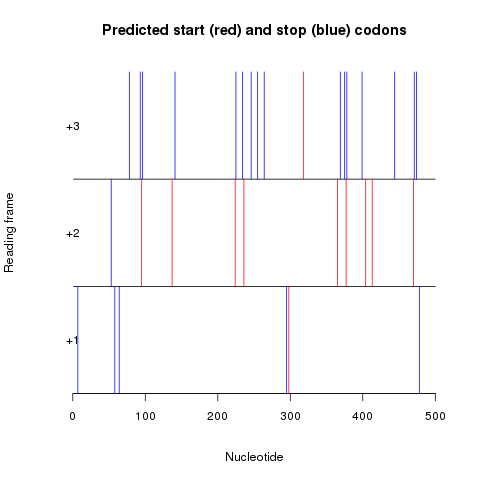

In [196]:
%%R
plotPotentialStartsAndStops(dengueseqstartstring)


In [197]:
%%R
findORFsinSeq <- function(sequence)
  {
     require(Biostrings)
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     # Find the length of vector "positions"
     numpositions <- length(positions)
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj  <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 # Add in the length of the stop codon
                 orflength <- posj - posi + 3
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                      for (k in 1:numorfs)
                      {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                      }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Find the lengths of the ORFs that we have
     orflengths <- numeric()
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        orflength <- orfstop - orfstart + 1
        orflengths <- append(orflengths,orflength,after=length(orflengths))
     }
     mylist <- list(orfstarts, orfstops, orflengths)
     return(mylist)
  }

In [198]:
%%R
s1 <- "aaaatgcagtaacccatgccc"
findORFsinSeq(s1)


[[1]]
[1] 4

[[2]]
[1] 12

[[3]]
[1] 9



In [199]:
%%R
findORFsinSeq(dengueseqstartstring)

[[1]]
[1] 298 318

[[2]]
[1] 480 371

[[3]]
[1] 183  54



In [200]:
%%R
plotORFsinSeq <- function(sequence)
  {
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     numpositions <- length(positions) # Find the length of vector "positions"
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 orflength <- posj - posi + 3 # Add in the length of the stop codon
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                       for (k in 1:numorfs)
                       {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                       }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Make a plot showing the positions of ORFs in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame", main="Predicted ORFs")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Make a plot of the ORFs in the sequence:
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        remainder <- (orfstart-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           rect(orfstart,0,orfstop,1,col="cyan",border="black")
        }
        else if (remainder == 1)
        {
           rect(orfstart,1,orfstop,2,col="cyan",border="black")
        }
        else if (remainder == 2)
        {
           rect(orfstart,2,orfstop,3,col="cyan",border="black")
        }
     }
  }

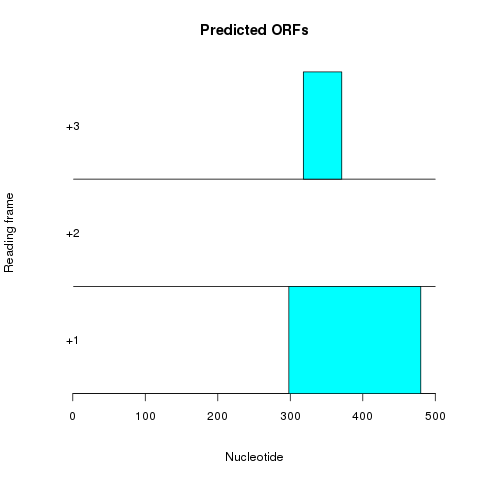

In [201]:
%%R
plotORFsinSeq(dengueseqstartstring)

In [202]:
%%R
s1 <- "aaaatgcagtaacccatgccc"
myorf <- substring(s1, 4, 12)
myorf # Print out the sequence of "myorf"

[1] "atgcagtaa"


In [203]:
%%R
 myorfvector <- s2c(myorf) # Convert the sequence of characters to a vector
print (myorfvector)               # Print out the value of "myorfvector"
seqinr::translate(myorfvector)


[1] "a" "t" "g" "c" "a" "g" "t" "a" "a"
[1] "M" "Q" "*"


In [204]:
%%R
forward <- "AAAATGCTTAAACCATTGCCC"
forwardvector <- s2c(forward)                # Convert the string of characters to a vector
print (forwardvector)                                # Print out the vector containing the forward strand sequence
reversevector <- rev(comp(forwardvector))    # Find the reverse strand sequence, by finding the reverse complement
print(reversevector)                                # Print out the vector containing the reverse strand sequence
reverse <- c2s(reversevector)                # Convert the vector to a string of characters
reverse                                      # Print out the string of characters containing the reverse strand sequence

 [1] "A" "A" "A" "A" "T" "G" "C" "T" "T" "A" "A" "A" "C" "C" "A" "T" "T" "G" "C"
[20] "C" "C"
 [1] "g" "g" "g" "c" "a" "a" "t" "g" "g" "t" "t" "t" "a" "a" "g" "c" "a" "t" "t"
[20] "t" "t"
[1] "gggcaatggtttaagcatttt"


In [206]:
%%R
complement <- comp(forwardvector)            # Find the complement of the forward strand sequence
reversevector <- rev(complement) 
findORFsinSeq(reverse)

[[1]]
[1] 6

[[2]]
[1] 14

[[3]]
[1] 9



In [208]:
%%R
generateSeqsWithMultinomialModel <- function(inputsequence, X)
  {
     # Change the input sequence into a vector of letters
     require("seqinr") # This function requires the SeqinR package.
     inputsequencevector <- s2c(inputsequence)
     # Find the frequencies of the letters in the input sequence "inputsequencevector":
     mylength <- length(inputsequencevector)
     mytable <- table(inputsequencevector)
     # Find the names of the letters in the sequence
     letters <- rownames(mytable)
     numletters <- length(letters)
     probabilities <- numeric() # Make a vector to store the probabilities of letters
     for (i in 1:numletters)
     {
        letter <- letters[i]
        count <- mytable[[i]]
        probabilities[i] <- count/mylength
     }
     # Make X random sequences using the multinomial model with probabilities "probabilities"
     seqs <- numeric(X)
     for (j in 1:X)
     {
        seq <- sample(letters, mylength, rep=TRUE, prob=probabilities) # Sample with replacement
        seq <- c2s(seq)
        seqs[j] <- seq
     }
     # Return the vector of random sequences
     return(seqs)
  }

In [209]:
%%R
myseq    <- "AAAATGCTTAAACCATTGCCC"
generateSeqsWithMultinomialModel(myseq, 1) 


[1] "TGATTATGTCAACTTACACTC"


In [210]:
%%R
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
orflengths <- mylist[[3]]                   # Find the lengths of ORFs in "dengueseqstring"
randseqs <- generateSeqsWithMultinomialModel(dengueseqstring, 10) # Generate 10 random sequences using the multinomial model
randseqorflengths <- numeric()              # Tell R that we want to make a new vector of numbers
for (i in 1:10)
  {
     print(i)
     randseq <- randseqs[i]                     # Get the ith random sequence
     mylist <- findORFsinSeq(randseq)           # Find ORFs in "randseq"
     lengths <- mylist[[3]]                     # Find the lengths of ORFs in "randseq"
     randseqorflengths <- append(randseqorflengths, lengths, after=length(randseqorflengths))
  }

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


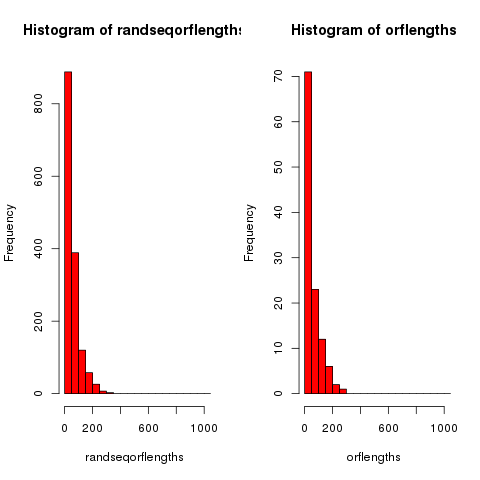

In [211]:
%%R
par(mfrow = c(1,2))                      # Make a picture with two plots side-by-side (one row, two columns)
bins <- seq(0,11000,50)                  # Set the bins for the histogram
hist(randseqorflengths, breaks=bins, col="red", xlim=c(0,1000))
hist(orflengths, breaks=bins, col="red", xlim=c(0,1000))

In [213]:
%%R 
print (max(randseqorflengths))
summary(orflengths > 342)


[1] 333
   Mode   FALSE    TRUE    NA's 
logical     115       1       0 


In [215]:
%%R
quantile(randseqorflengths, probs=c(0.99))

99% 
240 


# Comparative genomics

In [217]:
%%R
library("biomaRt") # Load the biomaRt package in R
listMarts()        # List all databases that can be queried

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘biomaRt’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:seqinr’:

    getSequence


  res = super(Function, self).__call__(*new_args, **new_kwargs)


                                 biomart
1                                ensembl
2                                    snp
3                             regulation
4                                   vega
5                          fungi_mart_28
6                    fungi_variations_28
7                        metazoa_mart_28
8                  metazoa_variations_28
9                         plants_mart_28
10                  plants_variations_28
11                      protists_mart_28
12                protists_variations_28
13                                   msd
14                            cg_mart_02
15                                 WS220
16                         parasite_mart
17                               biomart
18                               example
19                      prod-intermart_1
20                               unimart
21                             biomartDB
22                              biblioDB
23                    Eurexpress Biomart
24              

In [221]:
%%R
ensemblprotists <- useMart("protists_mart_28") # Specify that we want to query the Ensembl Protists database
listDatasets(ensemblprotists)   


                   dataset
1         pramorum_eg_gene
2           pvivax_eg_gene
3        piwayamai_eg_gene
4      ddiscoideum_eg_gene
5         glamblia_eg_gene
6           lmajor_eg_gene
7        pknowlesi_eg_gene
8          tgondii_eg_gene
9       plateralis_eg_gene
10      alaibachii_eg_gene
11       pchabaudi_eg_gene
12  harabidopsidis_eg_gene
13        pultimum_eg_gene
14 paphanidermatum_eg_gene
15    tthermophila_eg_gene
16      pkernoviae_eg_gene
17     pfalciparum_eg_gene
18   parrhenomanes_eg_gene
19        pberghei_eg_gene
20    ehistolytica_eg_gene
21         bnatans_eg_gene
22          psojae_eg_gene
23    ptetraurelia_eg_gene
24     tpseudonana_eg_gene
25     pirregulare_eg_gene
26          gtheta_eg_gene
27    ptricornutum_eg_gene
28      pinfestans_eg_gene
29         pvexans_eg_gene
30        ehuxleyi_eg_gene
31     pparasitica_eg_gene
32         tbrucei_eg_gene
                                                                                  description
1              

In [222]:
%%R
ensemblleishmania <- useDataset("lmajor_eg_gene",mart=ensemblprotists)
leishmaniaattributes <- listAttributes(ensemblleishmania)
attributenames <- leishmaniaattributes[[1]]
attributedescriptions <- leishmaniaattributes[[2]]
print(length(attributenames))                     # Find the length of vector "attributenames"
print (attributenames[1:10])                       # Print out the first 10 entries in vector "attributenames"
attributedescriptions[1:10]                # Print out the first 10 entries in vector "attributedescriptions"


[1] 589
 [1] "ensembl_gene_id"       "ensembl_transcript_id" "ensembl_peptide_id"   
 [4] "chromosome_name"       "start_position"        "end_position"         
 [7] "strand"                "band"                  "transcript_start"     
[10] "transcript_end"       
 [1] "Gene stable ID"           "Transcript stable ID"    
 [3] "Protein stable ID"        "Chromosome/scaffold name"
 [5] "Gene start (bp)"          "Gene end (bp)"           
 [7] "Strand"                   "Band"                    
 [9] "Transcript start (bp)"    "Transcript end (bp)"     


In [223]:
%%R
leishmaniagenes <- getBM(attributes = c("ensembl_gene_id"), mart=ensemblleishmania)
leishmaniagenenames <- leishmaniagenes[[1]] # Get the vector of the names of all L. major genes
print (length(leishmaniagenenames))
leishmaniagenenames[1:10]

[1] 9379
 [1] "LmjF.01.0010" "LmjF.01.0020" "LmjF.01.0030" "LmjF.01.0040" "LmjF.01.0050"
 [6] "LmjF.01.0060" "LmjF.01.0070" "LmjF.01.0080" "LmjF.01.0090" "LmjF.01.0100"


In [224]:
%%R
leishmaniagenes2 <- getBM(attributes = c("ensembl_gene_id", "gene_biotype"), mart=ensemblleishmania)
leishmaniagenenames2 <- leishmaniagenes2[[1]] # Get the vector of the names of all L. major genes
leishmaniagenebiotypes2 <- leishmaniagenes2[[2]] # Get the vector of the biotypes of all genes
table(leishmaniagenebiotypes2)

leishmaniagenebiotypes2
             ncRNA nontranslating_CDS     protein_coding         pseudogene 
                84                  4               8308                 90 
              rRNA             snoRNA              snRNA               tRNA 
                63                741                  6                 83 


In [225]:
%%R
ensemblpfalciparum <- useDataset("pfalciparum_eg_gene",mart=ensemblprotists)
pfalciparumgenes <- getBM(attributes = c("ensembl_gene_id", "gene_biotype"), mart=ensemblpfalciparum)
pfalciparumgenenames <- pfalciparumgenes[[1]] # Get the names of the P. falciparum genes
pfalciparumgenebiotypes <- pfalciparumgenes[[2]] # Get the types of the P. falciparum genes
table(pfalciparumgenebiotypes)


pfalciparumgenebiotypes
             ncRNA nontranslating_CDS     protein_coding               rRNA 
               712                 77               5352                 24 
             snRNA               tRNA 
                 3                 45 


In [226]:
%%R
leishmaniagenes <- getBM(attributes = c("ensembl_gene_id", "pfalciparum_eg_gene",
   "pfalciparum_eg_orthology_type"), mart=ensemblleishmania)
leishmaniagenenames <- leishmaniagenes[[1]]      # Get the names of all Leishmania major genes
leishmaniaPforthologues <- leishmaniagenes[[2]]  # Get the P. falciparum orthologues of all L. major genes
leishmaniaPforthologuetypes <- leishmaniagenes[[3]] # Get the orthology relationship type
print(leishmaniagenenames[1:10])
print(leishmaniaPforthologues[1:10])
print(leishmaniaPforthologuetypes[1:10])

 [1] "LmjF.34.2510" "LmjF.34.2510" "LmjF.14.0650" "LmjF.14.0670" "LmjF.14.0680"
 [6] "LmjF.14.0710" "LmjF.36.2350" "LmjF.01.0010" "LmjF.01.0020" "LmjF.01.0030"
 [1] "PFD0505c" "PFL2365w" "PFI0980w" "PFI0980w" "PFA0455c" "PFA0455c"
 [7] ""         ""         ""         ""        
 [1] "ortholog_many2many" "ortholog_many2many" "ortholog_one2many" 
 [4] "ortholog_one2many"  "ortholog_one2many"  "ortholog_one2many" 
 [7] ""                   ""                   ""                  
[10] ""                  


In [227]:
%%R
myindex <- leishmaniaPforthologues==""
leishmaniagenenames2 <- leishmaniagenenames[myindex]
leishmaniagenes2 <- getBM(attributes = c("ensembl_gene_id", "gene_biotype"), mart=ensemblleishmania)
leishmaniagenes3 <- merge(leishmaniagenes2, leishmaniagenes)
leishmaniagenenames <- leishmaniagenes3[[1]]
leishmaniagenebiotypes <- leishmaniagenes3[[2]]
leishmaniaPforthologues <- leishmaniagenes3[[3]]
myindex <- leishmaniaPforthologues=="" & leishmaniagenebiotypes=="protein_coding"
leishmaniagenenames2 <- leishmaniagenenames[myindex]
length(leishmaniagenenames2)


[1] 6774
